## Introduction 

Natural language processing (NLP) is a hotbed of data science research these days, and sentiment analysis is one of the most common applications of NLP. This topic has fundamentally transformed the way businesses function, from opinion surveys to building entire marketing campaigns, which is why every data scientist should be conversant with it.

In comparison to the hours it would take a team of humans to manually do the same activity, thousands of text documents can be processed for sentiment (and other properties such as named entities, topics, themes, and so on) in seconds.

In this NLP project we will be sourcing twitter data. Data from Twitter is a valuable source of information on a variety of topics. This information can be used to spot patterns on specific topics, gauge public mood, get feedback on previous decisions, and even aid in the making of future ones.

After being dismissed as a purely scientific topic for decades, climate change has gotten a lot of attention from the general public in the last few years. Governments and international organizations like the UN are working harder than ever to raise and maintain public awareness about this global issue.

The goal of this project is to use Twitter data to assess public perceptions on climate change. This will give businesses access to a large pool of customer opinion, encompassing a wide range of demographics and geographic areas, allowing them to gain new insights and better inform future marketing tactics.

Increase Thrive Market's advertising efficiency by employing machine learning to develop effective marketing tools that can determine whether or not a person believes in climate change and, based on their tweets, might potentially be converted to a new customer.\

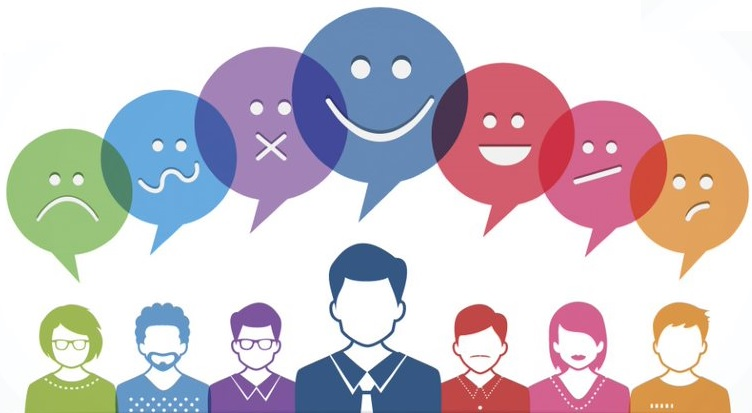

We'll begin by cleaning and preparing the raw text of the tweets. Then we'll go over the cleaned text and try to figure out what the tweets' context is. Following that, we'll extract numerical features from the data, which we'll then use to train models and detect the sentiments of the tweets.

# Table of contents:
- [Understand the Problem Statement](#section-one)
- [Import libraries and datasets](#section-one)
- [First glance at the raw data](#section-two)
- [Tweets Preprocessing and Cleaning](#section-three)
  * [Create copy](#subsection-one)
  * [Hashtag extraction](#subsection-two)
  * [Tweet cleaning](#subsection-three)
  * [Parts of speech tagging and lemmatization](#subsection-four)
  * [Word frequency](#subsection-five)
  * [Specific named entity extraction](#subsection-six)
- [Exploratory data analysis](#section-four)
  * [Target variable distribution](#subsection-one)
  * [Tweet length distribution](#subsection-two)
  * [Climate change buzzwords](#subsection-three)
  * [Hashtags](#subsection-four)
  * [People, places and organizations to watch](#subsection-five)
- [Building classification models](#section-five)
  * [Train-validation split](#subsection-one)
  * [Pipelines](#subsection-three)
  * [Train models](#subsection-four)
- [Model evaluation](#section-six)
  * [Random forest](#subsection-one)
  * [Naive Bayes](#subsection-two)
  * [K nearest neighbors](#subsection-three)
  * [Logistic regression](#subsection-four)
  * [Linear SVC](#subsection-five)
- [Model Selection](#section-seven)
- [Hyperparameter tuning](#section-eight)
- [Submission](#section-nine)
- [Conclusion](#section-ten)
- [Acknowledgements](#section-eleven)

<img src="https://i.gifer.com/RD07.gif">


### 1. Understanding the Problem Statement

The problem statement is as follows:

The goal of this study is to use Twitter data to investigate public perceptions of climate change. Businesses would have access to a large pool of customer input from a wide range of demographics and geographic areas, allowing them to gain new insights and better inform future marketing initiatives.

The tweets are divided into 4 classes:

* [ 2 ] News : Tweets linked to factual news about climate change.

* [ 1 ] Pro : Tweets that support the belief of man-made climate change.

* [ 0 ] Neutral : Tweets that neither support nor refuse beliefs of climate change.

*  [-1 ] Anti : Tweets that do not support the belief of man-made climate change.

### 2. Tweets Preprocessing and Cleaning

Preprocessing text data is important because it prepares the raw text for mining, making it easier to extract information from the text and apply machine learning algorithms to it. If we omit this stage, the likelihood of working with noisy and inconsistent data increases. The goal of this phase is to remove noise that isn't important in determining the sentiment of tweets, such as punctuation, special characters, numerals, and phrases that aren't important in the context of the text.


In [ ]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [ ]:
# from google.colab import files
 
 
# uploaded = files.upload()

In [ ]:
train  = pd.read_csv('train.csv')
test = pd.read_csv('test_with_no_labels.csv')

Let’s check the first few rows of the train dataset.

In [ ]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


The dataframe has 3 columns sentiment, message, and tweetid. Sentiment is the target variable and message contains the tweets that we will clean and preprocess.

Initial data cleaning requirements that we can think of after looking at the top 5 records:


- We might also consider removing punctuation, numbers, and even special characters because they don't assist distinguish between different types of tweets.
- The majority of the smaller words provide little value. For instance, 'we,' 'was,' and 'a.' As a result, we'll make an effort to remove them from our database as well.
- We may separate each tweet into individual words or tokens after we've completed the previous processes, which is an important step in any NLP task.



### A) Removing Twitter Handles (@user)

A user-defined function to eliminate undesirable text patterns from tweets is provided below. It accepts two arguments: one is the original text string, and the other is the text pattern we wish to delete from the string. The function returns the same input string as before, but without the pattern you specified. This function will be used to remove the pattern '@user' from all of the tweets in our database.



In [ ]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [ ]:
# remove twitter handles (@user) for train
train['tidy_tweet'] = np.vectorize(remove_pattern)(train['message'], "@[\w]*")

# remove twitter handles (@user) for test
test['tidy_tweet'] = np.vectorize(remove_pattern)(test['message'], "@[\w]*")

### B) Removing Punctuations, Numbers, and Special Characters

Punctuation, digits, and special characters don't help much, as previously stated. It is preferable to remove them from the text in the same way that the twitter handles were deleted. Everything except characters and hashtags will be replaced with spaces in this section.

In [ ]:
# remove special characters, numbers, punctuations for train
train['tidy_tweet'] = train['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

# remove special characters, numbers, punctuations for test
test['tidy_tweet'] = test['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


### C) Removing Short Words 

When picking the length of the words we want to delete, we must exercise caution. As a result, I've chosen to delete any words with a length of three or fewer. Terms like "huh" and "oh" are, for example, rarely used. It is preferable to eliminate them.

In [ ]:
train['tidy_tweet'] = train['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test['tidy_tweet'] = test['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
train.head()

,sentiment,message,tweetid,tidy_tweet
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,PolySciMajor chief doesn think carbon dioxide ...
1,1,It's not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,Researchers have three years climate change be...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,#TodayinMaker# WIRED pivotal year climate chan...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,racist sexist climate change denying bigot lea...


The difference between the raw and cleaned tweets (tidy tweet) can be seen fairly clearly. The noise (numbers, punctuation, and special characters) has been removed from the tweets, leaving only the key words.

In [ ]:
from nltk.corpus import stopwords

#Remove stop wards
for i in train['tidy_tweet']:
    i=[word for word in i if not word in stopwords.words('english') and word != 'not'] 

### D) Tokenization 

All of the cleansed tweets in our dataset will now be tokenized. Tokenization is the process of breaking a string of text into tokens, where tokens are individual keywords or words.


In [ ]:
tokenized_tweet = train['tidy_tweet'].apply(lambda x: x.split())
test_tokenized = test['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()


0    [PolySciMajor, chief, doesn, think, carbon, di...
1    [like, lack, evidence, anthropogenic, global, ...
2    [Researchers, have, three, years, climate, cha...
3    [#TodayinMaker#, WIRED, pivotal, year, climate...
4    [racist, sexist, climate, change, denying, big...
Name: tidy_tweet, dtype: object

### E) Stemming

Stemming is the process of removing suffixes ("ing", "ly", "es", "s", and so on) from a word using a set of rules. For instance, the words "play," "player," "played," "plays," and "playing" are all variations of the word "play."


In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])
test_tokenized = test_tokenized.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [polyscimajor, chief, doesn, think, carbon, di...
1        [like, lack, evid, anthropogen, global, warm]
2    [research, have, three, year, climat, chang, b...
3    [#todayinmaker#, wire, pivot, year, climat, ch...
4    [racist, sexist, climat, chang, deni, bigot, l...
Name: tidy_tweet, dtype: object

In [ ]:
# Now let’s stitch these tokens back together for train
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

train['tidy_tweet'] = tokenized_tweet

# Now let’s stitch these tokens back together for test
for i in range(len(test_tokenized)):
    test_tokenized[i] = ' '.join(test_tokenized[i])

test['tidy_tweet'] = test_tokenized

In [ ]:
from sklearn.utils import resample
class_size=4500
resampled_classes = []

# For each label
for label in train['sentiment'].unique():
    # Get num. of observations from this class
    label_size = len(train[train['sentiment']==label])
    
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = train[train['sentiment'] == label]
        label_resampled = resample(label_data, replace=True, n_samples=class_size, random_state=27) 
    else:
        # Downsampleresampled_data = np.concatenate(resampled_classes, axis=0)
        label_data = train[train['sentiment'] == label]
        label_resampled = resample(label_data, replace=False, n_samples=class_size, random_state=27)
        
    resampled_classes.append(label_resampled)
    
train = pd.concat(resampled_classes, axis=0)
train.shape

(18000, 4)

### 3. Story Generation and Visualization from Tweets

We'll look at the cleaned tweets text in this section. Exploring and visualizing data, whether text or other types of data, is an important part of generating insights. 

Before we start exploring the data, we need to think about and ask questions about it. The following are some possible questions:

- What are the most frequently used words across the full dataset?
- What are the most frequently used words in the dataset for both negative and positive tweets?
- In a tweet, how many hashtags are there?
- Which patterns are connected to my data?
- Which tendencies are linked to either of these feelings? Are they in tune with the feelings?



#### A) Understanding the common words used in the tweets: WordCloud

Now I'd like to observe how evenly the specified feelings are dispersed throughout the train dataset. Understanding the common terms by producing wordclouds is one technique to accomplish this task.

A wordcloud is a visual representation in which the most often used words are displayed in larger font sizes and the less frequently used words are displayed in smaller font sizes.

Let's use the wordcloud plot to display all of the words in our data.

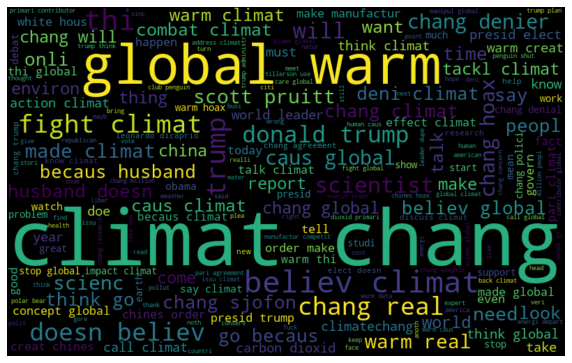

In [ ]:
all_words = ' '.join([text for text in train['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see that wordcloud consists of words from different classes. Words such as climate, global warm etc... have large fonts which is an indication of the important words.    

#### B) Words for the 'news' class

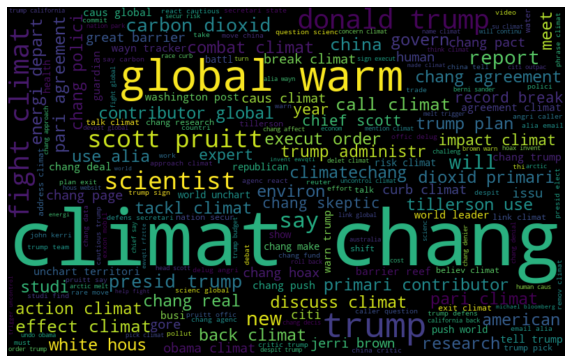

In [ ]:
news =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 2]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

For the news class, we see that words such as trump, fight, climate etc are prevalent words.  

#### C) Words for the 'pro' class

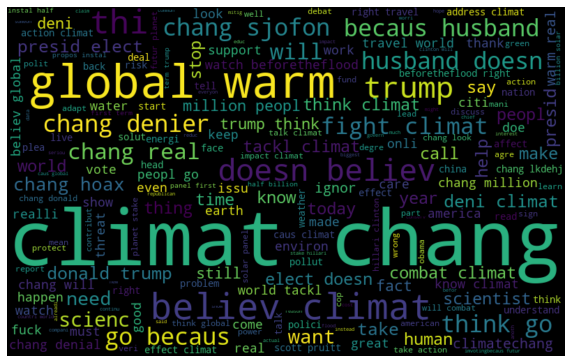

In [ ]:
news =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As for the 'pro' class, we observe words that support climate change. Words like 'believe', 'support' and climate change'

#### D) Words for the 'neutral' class

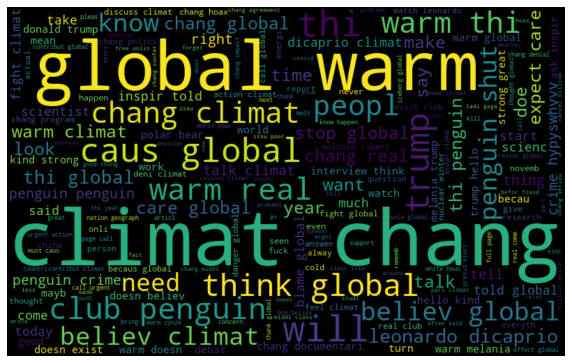

In [ ]:
news =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### E) Words for 'anti' class

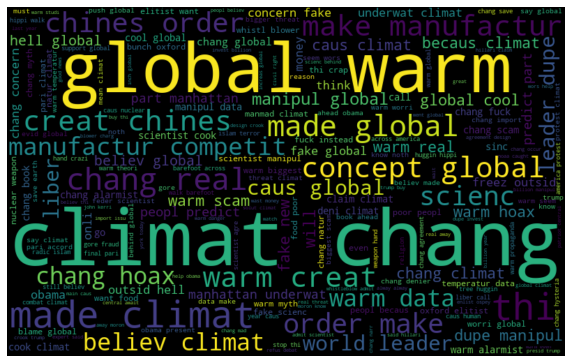

In [ ]:
news =' '.join([text for text in train['tidy_tweet'][train['sentiment'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(news)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

For the 'anti' class we come across words that are against climate change or rather, words that signigy anti climate change. Words such as 'fake', 'scam' etc

### D) Understanding the impact of Hashtags on tweets sentiment

Hashtags on Twitter are a way to keep track of what's trending on the platform at any given time. We should see if these hashtags provide any value to our sentiment analysis task, i.e., whether they aid in the classification of tweets into different sentiments.

In [ ]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [ ]:
# extracting hashtags from 'neatural' tweets
neutral_ = hashtag_extract(train['tidy_tweet'][train['sentiment'] == 0])
# extracting hashtags from 'pro' tweets
pro_ = hashtag_extract(train['tidy_tweet'][train['sentiment'] == 1])
# extracting hashtags from 'anti' tweets
anti_ = hashtag_extract(train['tidy_tweet'][train['sentiment'] == -1])
# extracting hashtags from 'news' tweets
news_ = hashtag_extract(train['tidy_tweet'][train['sentiment'] == 2])

# unnesting list
neutral_ = sum(neutral_,[])
pro_ = sum(pro_,[])
anti_ = sum(anti_,[])
news_ = sum(news_,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags. So, first let’s check the hashtags in the 'news' tweet.

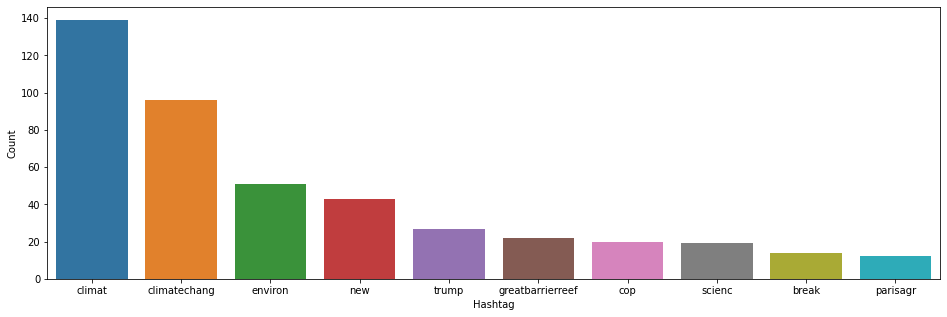

In [ ]:
a = nltk.FreqDist(news_)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

All of these hashtages fall under the news category. The plot summarizes the most common used words, prevalent words are climate change, environ and trump.  

Now let's have a look at the 'pro' class of words

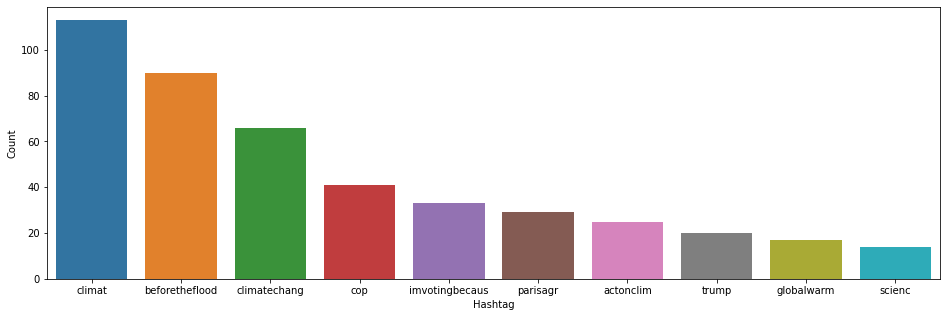

In [ ]:
b = nltk.FreqDist(pro_)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

Let's also have a look at the 'neutral' class

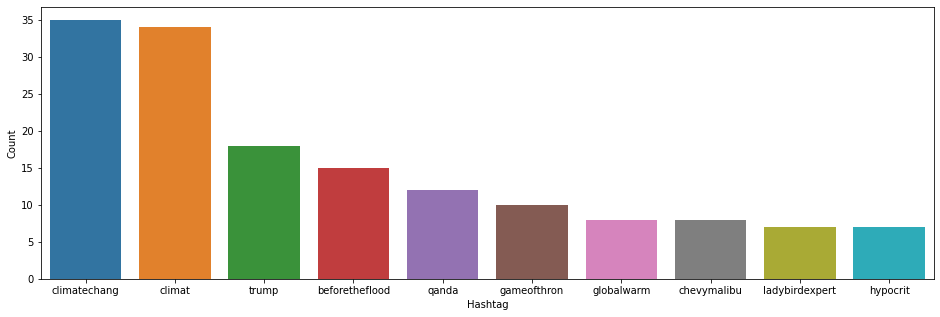

In [ ]:
b = nltk.FreqDist(neutral_)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

And finally 'anti' class 

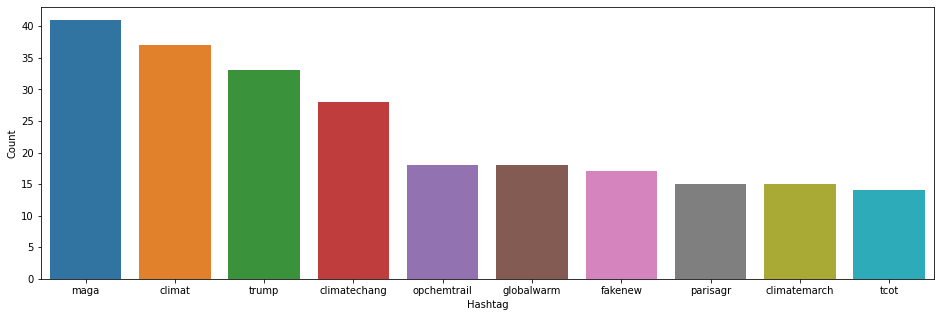

In [ ]:
b = nltk.FreqDist(anti_)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

From the plots above and the wordcloud we can infer the following:

- Climate is present in three of the classes.
- In the news class, we observe that words like 'scientist' and 'science' is present. These are linked to scientific research that supports climate change.
- Words like real, believe, think, fight, etc. occur frequently in pro climate change tweets. In contrast, anti climate change tweets contain words such as 'hoax', 'scam', 'tax', 'liberal' and 'fake'. These negative connotations is an indication that there are people that do not believe that climate change is real much less an issue.
- We also observe a word 'epa' which is linked to an agency that is in support of climate change. It is present in two of the classes.

### 4. Extracting Features from Cleaned Tweets

It is necessary to turn preprocessed data into features in order to examine it. Text features can be built using a variety of techniques, including Bag-of-Words, TF-IDF, and Word Embeddings, depending on the application. Only Bag-of-Words and TF-IDF will be discussed in this article.

#### Bag-of-Words Features
A bag-of-words is a text representation that describes the frequency with which words appear in a document. It entails two steps: A list of terms that are well-known. A metric for determining the existence of well-known terms.

We will set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(train['tidy_tweet'])

#### TF-IDF Features


This is another method based on the frequency method, but it differs from the bag-of-words approach in that it considers the incidence of a word across the entire corpus, rather than just in a single document (or tweet).

The TF-IDF works by penalizing popular terms by assigning them lower weights, while emphasizing words that are uncommon across the corpus but appear frequently in a few documents.

Let’s have a look at the important terms related to TF-IDF:

- TF = (Number of times term t appears in a document)/(Number of terms in the document)
- IDF = log(N/n), where, N is the number of documents and n is the number of documents a term t has appeared in.
- TF-IDF = TF*IDF

In [ ]:
# Separating input feature and label
X=train.tidy_tweet
y=train.sentiment

In [ ]:
from sklearn.model_selection import train_test_split as train_test_split 
# Separating the 95% data for training data and 20% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =26105111)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# # TF-IDF feature matrix
# tfidf = tfidf_vectorizer.fit_transform(train['tidy_tweet'])

# Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))


No. of feature_words:  60518


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!pip install mathjax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### 5. Model Building: Sentiment Analysis

We've completed all of the pre-modeling steps required to collect the data in the correct format. Now we'll use the two feature sets — Bag-of-Words and TF-IDF — to develop predictive models on the dataset.

To create the models, we'll utilize logistic regression. It fits data to a logit function to forecast the likelihood of an event occurring.

In Logistic Regression, the following equation is used:

 




#### A) Building model using Bag-of-Words features

In [ ]:
 # Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(train['tidy_tweet'])

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

['aaa', 'aaaaaaaaaaa', 'aaaaaand', 'aaaand', 'aafv', 'aag', 'aaihr', 'aaissfab', 'aaklx', 'aamrri']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train.values)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test.values)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
# print(tfidf_train.A[:5])


['aaa', 'aaaaaaaaaaa', 'aaaaaand', 'aaaand', 'aafv', 'aag', 'aaissfab', 'aaklx', 'aamrri', 'aasuekmz']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrames are equal
# print(count_df.equals(tfidf_df))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


   aaa  aaaaaaaaaaa  aaaaaand  aaaand  aafv  aag  aaihr  aaissfab  aaklx  \
0    0            0         0       0     0    0      0         0      0   
1    0            0         0       0     0    0      0         0      0   
2    0            0         0       0     0    0      0         0      0   
3    0            0         0       0     0    0      0         0      0   
4    0            0         0       0     0    0      0         0      0   

   aamrri  ...  zyjyqx  zylxxcancf  zymvr  zyozk  zysocsfloo  zzfozdi  \
0       0  ...       0           0      0      0           0        0   
1       0  ...       0           0      0      0           0        0   
2       0  ...       0           0      0      0           0        0   
3       0  ...       0           0      0      0           0        0   
4       0  ...       0           0      0      0           0        0   

   zzjbarsr  zzpw  zzrvuvthup  zzxtag  
0         0     0           0       0  
1         0     0       

In [ ]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import numpy as np

# Create the list of alphas: alphas
alphas = np.arange(0, 1, .1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)
    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)
    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)
    # Compute accuracy: score
    score = metrics.accuracy_score(y_test, pred)
    return score

# Iterate over the alphas and print the corresponding score
for alpha in alphas:
    print('Alpha: ', alpha)
    print('Score: ', train_and_predict(alpha))
    print()
    

Alpha:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:557: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  % _ALPHA_MIN


Score:  0.8063888888888889

Alpha:  0.1
Score:  0.8080555555555555

Alpha:  0.2
Score:  0.8061111111111111

Alpha:  0.30000000000000004
Score:  0.7997222222222222

Alpha:  0.4
Score:  0.7947222222222222

Alpha:  0.5
Score:  0.7886111111111112

Alpha:  0.6000000000000001
Score:  0.7872222222222223

Alpha:  0.7000000000000001
Score:  0.7852777777777777

Alpha:  0.8
Score:  0.7822222222222223

Alpha:  0.9
Score:  0.78



In [ ]:
from sklearn.svm import LinearSVC

tfidf_svc = LinearSVC()
tfidf_svc.fit(tfidf_train, y_train)
tfidf_svc_pred = tfidf_svc.predict(tfidf_test)
tfidf_svc_score = metrics.accuracy_score(y_test, tfidf_svc_pred)

print("LinearSVC Score:   %0.3f" % tfidf_svc_score)

svc_cm = metrics.confusion_matrix(y_test, tfidf_svc_pred, labels=[-1,0,1, 2])
print(svc_cm)
 

LinearSVC Score:   0.848
[[874  16  22   8]
 [ 34 784  54  30]
 [ 68 114 564 136]
 [  6  15  46 829]]


In [ ]:
from sklearn.metrics import classification_report

print('Classification Report')
print(classification_report(y_test, tfidf_svc_pred, labels=[-1,0,1, 2]))

Classification Report
              precision    recall  f1-score   support

          -1       0.89      0.95      0.92       920
           0       0.84      0.87      0.86       902
           1       0.82      0.64      0.72       882
           2       0.83      0.93      0.87       896

    accuracy                           0.85      3600
   macro avg       0.85      0.85      0.84      3600
weighted avg       0.85      0.85      0.84      3600



In [ ]:
from sklearn.ensemble import RandomForestClassifier  
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(tfidf_train, y_train)

rfc_predict = rfc.predict(tfidf_test)

print(classification_report(y_test, rfc_predict, labels=[-1,0,1, 2]))

              precision    recall  f1-score   support

          -1       0.95      0.95      0.95       920
           0       0.81      0.90      0.85       902
           1       0.82      0.64      0.72       882
           2       0.84      0.92      0.88       896

    accuracy                           0.85      3600
   macro avg       0.85      0.85      0.85      3600
weighted avg       0.85      0.85      0.85      3600



In [ ]:
from sklearn.linear_model import LogisticRegression

# create one or more ML models
lr = LogisticRegression()
lr.fit(tfidf_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Model 1: Logistic regression
pred_lr = lr.predict(tfidf_test)

In [ ]:
# Compare model performance
#Model 1: Logistic Regression
print(classification_report(y_test,pred_lr, labels=[-1,0,1, 2]))

              precision    recall  f1-score   support

          -1       0.86      0.90      0.88       920
           0       0.79      0.81      0.80       902
           1       0.77      0.61      0.68       882
           2       0.79      0.91      0.84       896

    accuracy                           0.81      3600
   macro avg       0.80      0.81      0.80      3600
weighted avg       0.80      0.81      0.80      3600



### For Submission to Kaggle

In [ ]:
test_tokenized

0        europ will look china make sure that alon figh...
1        combin thi with poll staffer climat chang wome...
2        scari unimpeach evid that climat chang alreadi...
3        putin jill trump doesn believ climat chang thi...
4         femal orgasm caus global warm sarcast republican
                               ...                        
10541    write poem about climat chang #climatechang #s...
10542    year climat chang came home dure hottest year ...
10543    pacif countri posit about fiji lead global cli...
10544               must caus global warm #aldublaboroflov
10545    climat chang global issu that onli get wors ea...
Name: tidy_tweet, Length: 10546, dtype: object